In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns

In [48]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [20]:
bom_gross = pd.read_csv('data/bom.movie_gross.csv') #suggested use
imdb_name_basics = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv') #suggested use
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv') #suggested use
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')

# These two .tsv so need to define the delimiter/seperator
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', sep='\t')

# This one also required a different encoding format, error while reading UTF-8
rt_reviews = pd.read_csv('data/rt.reviews.tsv', sep='\t', encoding = "ISO-8859-1")

In [21]:
bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [22]:
bom_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [23]:
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [24]:
imdb_title_basics.tconst.duplicated().value_counts()

False    146144
Name: tconst, dtype: int64

In [25]:
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [26]:
imdb_title_ratings.tconst.duplicated().value_counts()

False    73856
Name: tconst, dtype: int64

In [27]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


Probably merge on names, but first make all lower case, remove punctuation, etc, so name strings agree

Star Wars example, contains 'episode' or not

Remind lindsey to share data "cleaning never gets better, philadelphia"

Try python library that matches strings by percentage similar content

Ok heres the plan: first merge the two imdb arrays (ratings and basic) on the tconst index. Work with that, then think about merging that with BOM using titles after parsing like above. 

### Joining IMDB basics and ratings with tconst id column

All IDs in each dataframe appear to be unique
Basics includes 146144 rows and Ratings has 73856. So we lose about half our data, but 73k is still a lot of movies to look at. The movies that do have ratings are probably more popular and of interest while ones that don't have an IMDB rating are probably small enough to ignore. 

In [28]:
imdb_title_basics.set_index('tconst', inplace=True)
imdb_title_ratings.set_index('tconst', inplace=True)

In [29]:
basics_ratings = imdb_title_basics.join(imdb_title_ratings, how='inner')
basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


The new DF contains the same number of rows as imdb_ratings, so every tconst ID was able to match up with basics - a very successful inner join

Now going to create a new column that contains the genres as a list of each genre in string format

In [30]:
basics_ratings['list_genres'] = basics_ratings['genres'].map(lambda x: str(x).split(','))

basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,list_genres
tconst,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama]
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]"


Now get all the different genre types

In [31]:
list_of_genre_types = []
for i in range(len(basics_ratings)):
    for x in basics_ratings['list_genres'][i]:
        if x in list_of_genre_types:
            continue
        elif x not in list_of_genre_types:
            list_of_genre_types.append(x)

In [40]:
list_of_genre_types.sort()
list_of_genre_types

['Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Short',
 'Sport',
 'Thriller',
 'War',
 'Western',
 'nan']

Next idea to sort by genre: create a separate column for each genre that contains a True of False value for if that genre is contained in the movies 'list_genres' column. Then it will be very easy to grab a dataframe of only movies with 'genre_x' = True using loc conditionals.

In [33]:
for genre in list_of_genre_types:
    basics_ratings[genre] = basics_ratings['list_genres'].map(lambda x: True if (genre in x) else False)

In [34]:
basics_ratings.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,list_genres,Action,Adult,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,nan
tconst,,,,,,,,,,,,,,,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,"[Action, Crime, Drama]",True,False,...,False,False,False,False,False,False,False,False,False,False
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,"[Biography, Drama]",False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,[Drama],False,False,...,False,False,False,False,False,False,False,False,False,False
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13,"[Comedy, Drama]",False,False,...,False,False,False,False,False,False,False,False,False,False
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,"[Comedy, Drama, Fantasy]",False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
action_movies = basics_ratings[basics_ratings['Action'] == True]

In [39]:
action_movies['averagerating'].describe()

count    6988.000000
mean        5.810361
std         1.513833
min         1.000000
25%         4.800000
50%         6.000000
75%         6.900000
max         9.800000
Name: averagerating, dtype: float64

In [41]:
comedy_movies = basics_ratings[basics_ratings['Comedy'] == True]

In [45]:
comedy_movies['averagerating']

tconst
tt0069204    6.1
tt0100275    6.5
tt0137204    8.1
tt0249516    1.9
tt0255820    5.9
            ... 
tt9899840    6.2
tt9899880    5.8
tt9903952    9.2
tt9908960    4.2
tt9910502    7.0
Name: averagerating, Length: 17290, dtype: float64

/Applications/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Density')

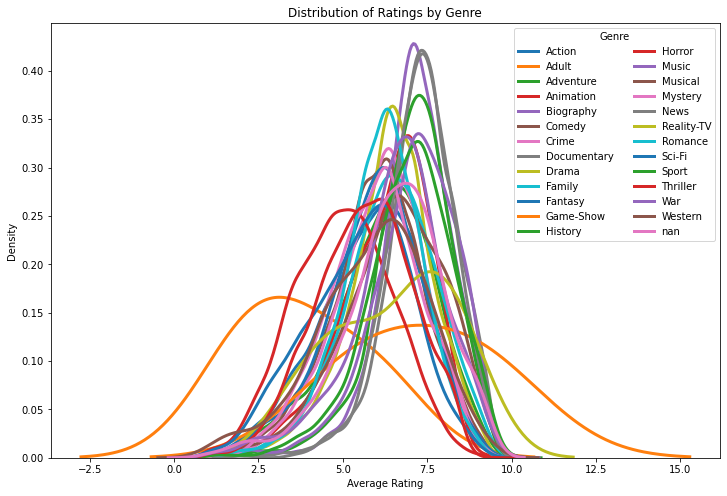

In [60]:
fig, ax = plt.subplots(figsize=(12,8))

for genre in list_of_genre_types:
    # Subset to the genre
    subset = basics_ratings[basics_ratings[genre] == True]
    
    # Draw the density plot
    sns.distplot(subset['averagerating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = genre)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Genre', ncol=2)
plt.title('Distribution of Ratings by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Density')

In [64]:
ratings_dict = {}

for genre in list_of_genre_types:
    ratings_dict[genre] = basics_ratings[basics_ratings[genre] == True]['averagerating'].mean()

In [65]:
ratings_dict

{'Action': 5.810360618202632,
 'Adult': 3.766666666666667,
 'Adventure': 6.196201205134923,
 'Animation': 6.2483075157773955,
 'Biography': 7.1622735626148595,
 'Comedy': 6.0026894158473105,
 'Crime': 6.115441335935806,
 'Documentary': 7.332090350926604,
 'Drama': 6.401559048980123,
 'Family': 6.394724501758499,
 'Fantasy': 5.919473189087488,
 'Game-Show': 7.3,
 'History': 7.04095575221239,
 'Horror': 5.003440187646598,
 'Music': 7.091971544715447,
 'Musical': 6.498335644937587,
 'Mystery': 5.920401447844685,
 'News': 7.2713298791019,
 'Reality-TV': 6.5,
 'Romance': 6.146607983001973,
 'Sci-Fi': 5.489755213055305,
 'Short': 8.8,
 'Sport': 6.961492790500424,
 'Thriller': 5.639114031885116,
 'War': 6.584290738569753,
 'Western': 5.868214285714285,
 'nan': 6.496144278606966}

In [128]:
ratings = []

for key, value in ratings_dict.items():
    ratings.append(value)

In [129]:
ratings

[5.810360618202632,
 3.766666666666667,
 6.196201205134923,
 6.2483075157773955,
 7.1622735626148595,
 6.0026894158473105,
 6.115441335935806,
 7.332090350926604,
 6.401559048980123,
 6.394724501758499,
 5.919473189087488,
 7.3,
 7.04095575221239,
 5.003440187646598,
 7.091971544715447,
 6.498335644937587,
 5.920401447844685,
 7.2713298791019,
 6.5,
 6.146607983001973,
 5.489755213055305,
 8.8,
 6.961492790500424,
 5.639114031885116,
 6.584290738569753,
 5.868214285714285,
 6.496144278606966]

In [133]:
norm = plt.Normalize(min(ratings), max(ratings))
ratings_forcolor=list(ratings_dict.values())
colors = plt.cm.Purples(norm(ratings))

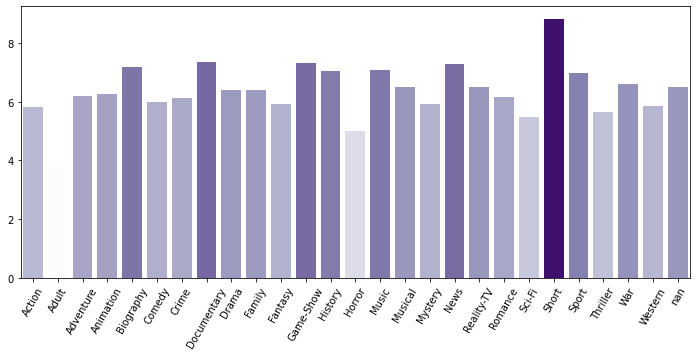

In [134]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(list_of_genre_types, ratings, palette = colors)

ax.tick_params(axis='x', labelrotation = 60)